# Natjecanje iz astronomije 2022

## Jesu li svi planetarni sustavi slični?

### Preuzimanje podataka i učitavanje knjižnica

Za ovaj praktičan rad potrebne su sljedeće knjižnice:
- seaborn: crtanje grafova
- numpy: računi u matematici
- pandas: obrada tablica
- matplotlib: crtanje grafova
- gc: brisanje bezpotrebnih varijabla i tablica da se memorija oslobodi

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import gc

Učitavam tablicu `exo_data` sa podatcima

In [2]:
#učitavanje podataka
exo_data = pd.read_csv('exoplanets.csv')

In [3]:
# pregledavanje tablice
print(exo_data.shape)
exo_data.head()

(4940, 14)


,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.6000,19.10,0.231,4742.0,2.70,-0.35,93.1846
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.8142,13.80,0.080,4213.0,2.78,-0.02,125.3210
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.5000,3.90,0.000,4813.0,2.20,-0.24,75.4392
3,14 Her b,14 Her,1,2,1773.40002,2.93,12.9,1481.0878,3.79,0.370,5338.0,0.90,0.41,17.9323
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.7374,1.26,0.680,5750.0,1.08,0.06,21.1397


## Osnovne karakteristike egzoplaneta: grafovi

Masa nasprem orbitalnog perioda egzoplaneta
<br>

<br>
Uočavamo 4 kategorije egzoplaneta

In [4]:
def annotate_countplot(sp, df: pd.DataFrame(), perc_height:float, font_size:int=10):
    for p in sp.patches:
        height = p.get_height()
    
        sp.text(p.get_x() + p.get_width()/2., 
                height + len(df) * perc_height, height,
                ha = 'center', fontsize = font_size)

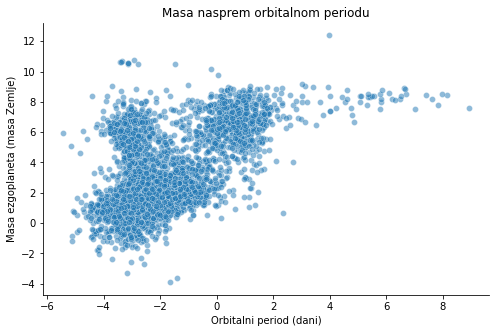

In [5]:
plt.figure(figsize=(8,5))
p = sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_bmasse']), alpha=0.5).set(title='Masa nasprem orbitalnom periodu')
sns.despine()
plt.xlabel('Orbitalni period (dani)')
plt.ylabel('Masa ezgoplaneta (masa Zemlje)')
plt.show()

Brojnost eksentriciteta egzoplaneta

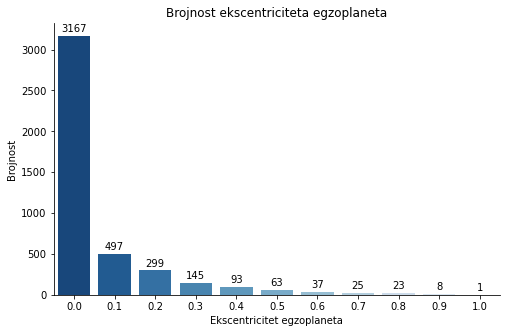

In [6]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=round(exo_data['pl_orbeccen'],1),palette='Blues_r',data = exo_data)
annotate_countplot(scp,exo_data,0.01)
sns.despine()
plt.xlabel('Ekscentricitet egzoplaneta')
plt.ylabel('Brojnost')
plt.title('Brojnost ekscentriciteta egzoplaneta')
plt.show()

Pokazivanje Keplerovog 3. zakona

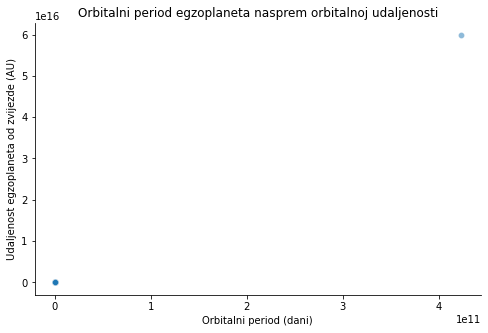

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=(exo_data['pl_orbsmax']**3),y=((exo_data['pl_orbper']**2)*exo_data['st_mass']),alpha=0.5).set(title='Orbitalni period egzoplaneta nasprem orbitalnoj udaljenosti')
sns.despine()
plt.xlabel('Orbitalni period (dani)')
plt.ylabel('Udaljenost egzoplaneta od zvijezde (AU)')
plt.show()

In [8]:
ht = exo_data[exo_data['pl_orbper']<1000].copy()

In [9]:
ht

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.030000,1.290000,12.1,6165.60000,19.100,0.2310,4742.00,2.70,-0.350,93.1846
1,11 UMi b,11 UMi,1,1,516.219970,1.530000,12.3,4684.81420,13.800,0.0800,4213.00,2.78,-0.020,125.3210
2,14 And b,14 And,1,1,185.840000,0.830000,12.9,1525.50000,3.900,0.0000,4813.00,2.20,-0.240,75.4392
4,16 Cyg B b,16 Cyg B,3,1,798.500000,1.660000,13.5,565.73740,1.260,0.6800,5750.00,1.08,0.060,21.1397
5,17 Sco b,17 Sco,1,1,578.380000,1.450000,12.9,1373.01872,3.510,0.0600,4157.00,1.22,-0.010,124.9530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,tau Gem b,tau Gem,1,1,305.500000,1.170000,12.1,6547.00000,20.300,0.0310,4388.00,2.30,0.140,112.5370
4935,ups And b,ups And,2,3,4.617033,0.059222,14.0,218.53100,0.438,0.0215,6156.77,1.30,0.101,13.4054
4936,ups And c,ups And,2,3,241.258000,0.827774,12.3,4443.24113,13.100,0.2596,6156.77,1.30,0.101,13.4054
4938,ups Leo b,ups Leo,1,1,385.200000,1.180000,14.2,162.09249,0.311,0.3200,4836.00,1.48,-0.200,52.5973


In [10]:
ht['a'] = ht['pl_orbsmax']**3
ht['P']= ((ht['pl_orbper']/365)**2) * ht['st_mass']
ht[ht['P']>25]

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist,a,P
829,HD 240237 b,HD 240237,1,1,745.70001,1.92,12.2,5050.3187,15.3,0.4,3926.0,8.76,-0.25,933.377,7.077888,36.563409
1058,HD 96127 b,HD 96127,1,1,647.29999,1.42,12.1,6661.7168,20.7,0.3,3943.0,10.94,-0.24,587.659,2.863288,34.406682


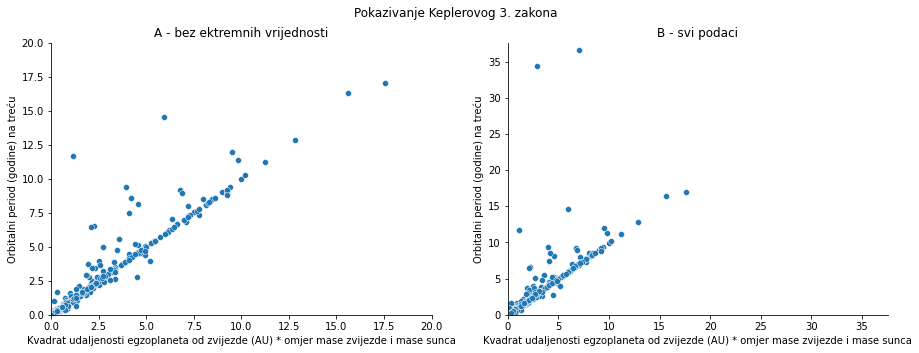

In [12]:
_,_ = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Pokazivanje Keplerovog 3. zakona')
a = ht['pl_orbsmax']**3
P = ((ht['pl_orbper']/365)**2) * ht['st_mass']
plt.subplot(1,2,1)
sns.scatterplot(x=a, y=P)
sns.despine()
plt.xlim(0,20)
plt.ylim(0,20)
plt.title('A - bez ektremnih vrijednosti')
plt.xlabel('Kvadrat udaljenosti egzoplaneta od zvijezde (AU) * omjer mase zvijezde i mase sunca')
plt.ylabel('Orbitalni period (godine) na treću')

plt.subplot(1,2,2)
sns.scatterplot(x=a, y=P)
sns.despine()
plt.title('B - svi podaci')
plt.xlim(0,(np.max(P)+1))
plt.ylim(0,(np.max(P)+1))
plt.xlabel('Kvadrat udaljenosti egzoplaneta od zvijezde (AU) * omjer mase zvijezde i mase sunca')
plt.ylabel('Orbitalni period (godine) na treću')


plt.show()

Radijus egzoplaneta nasprem orbitalnom periodu

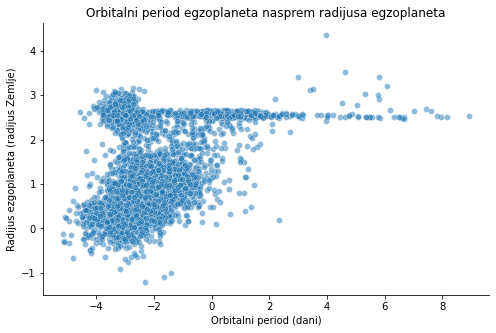

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_rade']), alpha=0.5).set(title='Orbitalni period egzoplaneta nasprem radijusa egzoplaneta')
sns.despine()
plt.xlabel('Orbitalni period (dani)')
plt.ylabel('Radijus ezgoplaneta (radijus Zemlje)')
plt.show()

Gustoća egzoplaneta ovisno o udaljenosti

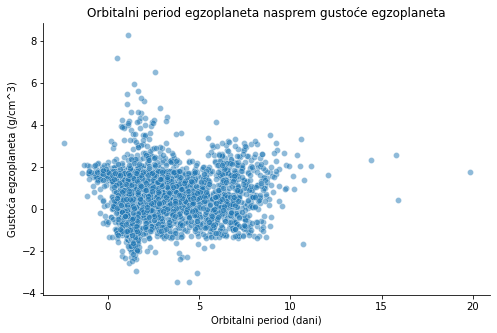

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbper']),y=np.log(exo_data['pl_dens']), alpha=0.5).set(title='Orbitalni period egzoplaneta nasprem gustoće egzoplaneta')
sns.despine()
plt.xlabel('Orbitalni period (dani)')
plt.ylabel('Gustoća egzoplaneta (g/cm^3)')
plt.show()

## Kategorizacija egzoplaneta po masi i radijusu

Četiri kategorije:
- Terestrički
- Super Zemlje
- Slični Neptunu
- Plinoviti divovi

In [35]:
for row in range(exo_data.shape[0]):
    r = exo_data.loc[row,'pl_rade']      # preuzmi radijus
    m = exo_data.loc[row,'pl_bmasse']    # preuzmi masu

    # ==== IMA RADIJUS =====
    if (np.isnan(m) and not np.isnan(r)):
        if (r < 1.6):
            exo_data.loc[row, 'exo_class'] = "Terestrički"
        elif (r >= 1.6) and (r < 2.5):
            exo_data.loc[row, 'exo_class'] = "Super Zemlja"
        elif (r >= 2.5) and (r < 10):
            exo_data.loc[row, 'exo_class'] = "Slični Neptunu"
        elif (r >= 10):
            exo_data.loc[row, 'exo_class'] = "Plinoviti div"
    # ==== IMA MASU =====
    elif (np.isnan(m) == False):
        if (m < 1):
            exo_data.loc[row, 'exo_class'] = "Terestrički"
        elif (m >= 1) and (m < 6):
            exo_data.loc[row, 'exo_class'] = "Super Zemlja"
        elif (m >= 6) and (m < 60):
            exo_data.loc[row, 'exo_class'] = "Slični Neptunu"
        elif (m >= 60):
            exo_data.loc[row, 'exo_class'] = "Plinoviti div"

del m,r,row
gc.collect()

23827

In [36]:
exo_data.exo_class.value_counts()

Super Zemlja      1707
Slični Neptunu    1614
Plinoviti div     1436
Terestrički        178
Name: exo_class, dtype: int64

Za one vrijednosti koje su `NaN` koristim funkciju `fillna()` kako bi se na tim mjestima postavio pravi NaN a ne `string` NaN

In [37]:
print(exo_data.exo_class.isnull().sum())
exo_data['exo_class'] = exo_data.exo_class.fillna(np.nan)

5


## Kategorizacija egzoplaneta po udaljenosti od zvijezde

Dvije kategorije:
- Vrući Neptuni
- Vrući Jupiteri

**POSTUPAK**
1. Napraviti novi kolonu gdje je prvo sve `NaN`
2. Kategorizirati egzoplanete po skali te upisati samo te vrijednosti u novu kolonu `exo_class_ext`
3. Provjeriti je li sve ok! Napraviti *crosstab* od `exo_class` i `exo_class_ext` te vidjeti štima li sve!
4. prebaciti vrijednosti iz `exo_class` u novu kolonu sa samo `fillna`

In [38]:
exo_data['exo_class_ext'] = np.nan
for row in range(exo_data.shape[0]):
    p = exo_data.loc[row,'pl_orbper']      
    c = exo_data.loc[row,'exo_class'] 
    if (p > 0) and (p < 4) and (c == "Slični Neptunu"): # Research paper
        exo_data.loc[row, 'exo_class_ext'] = "Vrući Neptun"
    elif (p > 0) and (p < 10) and (c == "Plinoviti div"): # Research paper
        exo_data.loc[row, 'exo_class_ext'] = "Vrući Jupiter"
del p,c,row
gc.collect()

2905

In [39]:
test = pd.crosstab(exo_data['exo_class'],exo_data['exo_class_ext'])
test.head()

exo_class_ext,Vrući Jupiter,Vrući Neptun
exo_class,,
Plinoviti div,572,0
Slični Neptunu,0,133


In [40]:
exo_data['exo_class_ext'] = exo_data['exo_class_ext'].fillna(exo_data['exo_class'])
exo_data.head()

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist,exo_class,exo_class_ext
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.6000,19.10,0.231,4742.0,2.70,-0.35,93.1846,Plinoviti div,Plinoviti div
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.8142,13.80,0.080,4213.0,2.78,-0.02,125.3210,Plinoviti div,Plinoviti div
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.5000,3.90,0.000,4813.0,2.20,-0.24,75.4392,Plinoviti div,Plinoviti div
3,14 Her b,14 Her,1,2,1773.40002,2.93,12.9,1481.0878,3.79,0.370,5338.0,0.90,0.41,17.9323,Plinoviti div,Plinoviti div
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.7374,1.26,0.680,5750.0,1.08,0.06,21.1397,Plinoviti div,Plinoviti div


In [41]:
# Check old classification
exo_data['exo_class'].value_counts()

Super Zemlja      1707
Slični Neptunu    1614
Plinoviti div     1436
Terestrički        178
Name: exo_class, dtype: int64

## Sumiranje egzoplaneta u tablice

### Broj planeta u sustavu i tip egzoplaneta

In [42]:
pl_num = pd.crosstab(exo_data['exo_class_ext'],exo_data['sy_pnum'])
pd.DataFrame(pl_num)
pl_num.head(10)

sy_pnum,1,2,3,4,5,6,7,8
exo_class_ext,,,,,,,,
Plinoviti div,572,211,44,25,6,4,0,2
Slični Neptunu,732,367,222,84,49,24,0,3
Super Zemlja,886,396,224,117,60,17,4,3
Terestrički,93,39,24,12,7,0,3,0
Vrući Jupiter,526,33,9,2,2,0,0,0
Vrući Neptun,85,22,14,8,1,3,0,0


### Tablica sa brojem zvijezde prema tipu egzoplaneta

In [43]:
st_num = pd.crosstab(exo_data['exo_class_ext'],exo_data['sy_snum'])
pd.DataFrame(st_num)
st_num.head(10)

sy_snum,1,2,3,4
exo_class_ext,,,,
Plinoviti div,704,136,22,2
Slični Neptunu,1395,83,3,0
Super Zemlja,1633,65,9,0
Terestrički,161,12,5,0
Vrući Jupiter,463,94,15,0
Vrući Neptun,124,9,0,0


### Summary tablica sa masom, radijusom, gustoćom i eksentricitetom za svaku vrstu egzoplaneta

**NOTE**
<br>
Koristiti `median` umjesto `mean` budući da su neke vrijednost abnormalno velike, te ako koristim `mean` potegnut će mi ostale vrijednost i neće biti točno. Bolje koristiti `median`, jer je preciznije i bolje. 

In [44]:
medijan_mase = exo_data.groupby('exo_class_ext')['pl_bmasse'].agg('median').to_dict()
medijan_gustoce = exo_data.groupby('exo_class_ext')['pl_dens'].agg('median').to_dict()
medijan_radijusa = exo_data.groupby('exo_class_ext')['pl_rade'].agg('median').to_dict()
medijan_eks = exo_data.groupby('exo_class_ext')['pl_orbeccen'].agg('median').to_dict()

summary = pd.DataFrame(index=exo_data['exo_class_ext'].unique())
summary['Masa'] = summary.index.map(medijan_mase)
summary['Radijus'] = summary.index.map(medijan_radijusa)
summary['Gustoca'] = summary.index.map(medijan_gustoce)
summary['Eksentricitet'] = summary.index.map(medijan_eks)
summary

,Masa,Radijus,Gustoca,Eksentricitet
Plinoviti div,723.92175,13.10,1.780,0.1825
Vrući Jupiter,299.07803,13.60,0.665,0.0000
Slični Neptunu,9.60000,2.93,1.950,0.0000
Vrući Neptun,8.91000,2.83,2.090,0.0000
Super Zemlja,3.29000,1.62,4.180,0.0000
Terestrički,0.56600,0.86,4.890,0.0000
NaN,NaN,NaN,NaN,NaN


### Postotak vrsta egzoplaneta

**NOTE**
<br>
- Koristiti funkciju koja automatizira proces
- round na 2 decimale
- koristi shape tablice a ne fiksiran broj, profesionalno i točnije

In [45]:
count = exo_data['exo_class_ext'].value_counts()
n = count.shape[0]
for i in range(n):
    planet_type = count[i]
    perc_value = planet_type/exo_data.shape[0]
    print(f'Postotak{planet_type} = {np.round(perc_value*100,2)}%')


Postotak1707 = 34.55%
Postotak1481 = 29.98%
Postotak864 = 17.49%
Postotak572 = 11.58%
Postotak178 = 3.6%
Postotak133 = 2.69%


## Planetarni sustavi

Ovdje ću napraviti 2 tablice, `ct` i `dt`. `ct` je tablica gdje ću brojati vrste egzoplaneta, a tablica `dt` je mjesto gdje ću prepisivati sve ostale podatke zvijezde, grupirati po `hostname` te spojiti sve zajedno u tablicu `planetary_systems`.

In [46]:
exo_data.head()

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist,exo_class,exo_class_ext
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.6000,19.10,0.231,4742.0,2.70,-0.35,93.1846,Plinoviti div,Plinoviti div
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.8142,13.80,0.080,4213.0,2.78,-0.02,125.3210,Plinoviti div,Plinoviti div
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.5000,3.90,0.000,4813.0,2.20,-0.24,75.4392,Plinoviti div,Plinoviti div
3,14 Her b,14 Her,1,2,1773.40002,2.93,12.9,1481.0878,3.79,0.370,5338.0,0.90,0.41,17.9323,Plinoviti div,Plinoviti div
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.7374,1.26,0.680,5750.0,1.08,0.06,21.1397,Plinoviti div,Plinoviti div


### Stvaranje `ct` tablice

In [64]:
ht = exo_data[['hostname','exo_class_ext']].copy()
pt = pd.crosstab([ht['hostname']],[ht['exo_class_ext']],dropna=False)
pt = pd.DataFrame(pt)
print(pt.shape[0])
pt.head()

3709


exo_class_ext,Plinoviti div,Slični Neptunu,Super Zemlja,Terestrički,Vrući Jupiter,Vrući Neptun
hostname,,,,,,
11 Com,1,0,0,0,0,0
11 UMi,1,0,0,0,0,0
14 And,1,0,0,0,0,0
14 Her,2,0,0,0,0,0
16 Cyg B,1,0,0,0,0,0


In [65]:
pt.nunique()

exo_class_ext
Plinoviti div     5
Slični Neptunu    6
Super Zemlja      6
Terestrički       6
Vrući Jupiter     3
Vrući Neptun      3
dtype: int64

### Stvaranje `dt` tablice

In [66]:
st = exo_data[['hostname','sy_snum','sy_pnum','st_met','st_teff']].copy()
st.drop_duplicates(inplace=True)
print(st.shape[0])
st.head()

3892


,hostname,sy_snum,sy_pnum,st_met,st_teff
0,11 Com,2,1,-0.35,4742.0
1,11 UMi,1,1,-0.02,4213.0
2,14 And,1,1,-0.24,4813.0
3,14 Her,1,2,0.41,5338.0
4,16 Cyg B,3,1,0.06,5750.0


Ovdje uočavam da mi `shape` od `ct` i od `dt` nisu isti, odnosno `dt` ima duplo. 

##### Kreiranje `check` kolone da mi pomogne riješiti problem prevelikog broja retka

In [67]:
st['check'] = st.groupby('hostname')['hostname'].transform('count')
st[st['check']>=2]

,hostname,sy_snum,sy_pnum,st_met,st_teff,check
3,14 Her,1,2,0.41,5338.00,2
51,BD+20 2457,1,2,-0.79,4259.00,2
52,BD+20 2457,1,2,-1.00,4137.00,2
65,BD-08 2823,1,2,-0.06,4816.00,2
66,BD-08 2823,1,2,-0.07,4746.00,2
...,...,...,...,...,...,...
4775,WASP-18,2,2,0.19,6400.00,2
4854,WASP-8,2,2,0.17,5600.00,2
4855,WASP-8,2,2,0.17,5690.00,2
4904,bet Pic,1,2,-0.21,8038.68,2


Uočavam da su mi problem metalicitet i temperatura, te sad moram uzeti `mean` od obje vrijednosti, dropat duplo i vratiti red u `dt`

In [51]:
st['st_metallicity'] = st.groupby('hostname')['st_met'].transform('mean')
st = st.drop(['st_met'],axis=1)
st.drop_duplicates(inplace=True)

st['st_temperature'] = st.groupby('hostname')['st_teff'].transform('mean')
st = st.drop(['st_teff'],axis=1)
st.drop_duplicates(inplace=True)

print(st.shape[0], pt.shape[0])
st.head()

3711 3709


,hostname,sy_snum,sy_pnum,check,st_metallicity,st_temperature
0,11 Com,2,1,1,-0.3500,4742.00
1,11 UMi,1,1,1,-0.0200,4213.00
2,14 And,1,1,1,-0.2400,4813.00
3,14 Her,1,2,2,0.4075,5326.47
4,16 Cyg B,3,1,1,0.0600,5750.00


In [52]:
st['check'] = st.groupby('hostname')['hostname'].transform('count')
st[st['check']>=2]

,hostname,sy_snum,sy_pnum,check,st_metallicity,st_temperature


In [53]:
st = st.drop(['check'],axis=1)

st.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature
0,11 Com,2,1,-0.3500,4742.00
1,11 UMi,1,1,-0.0200,4213.00
2,14 And,1,1,-0.2400,4813.00
3,14 Her,1,2,0.4075,5326.47
4,16 Cyg B,3,1,0.0600,5750.00


In [54]:
pt = pt.reset_index()

planetary_systems = pd.merge(st, pt, on='hostname',how='left')
planetary_systems.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature,Plinoviti div,Slični Neptunu,Super Zemlja,Terestrički,Vrući Jupiter,Vrući Neptun
0,11 Com,2,1,-0.3500,4742.00,1.0,0.0,0.0,0.0,0.0,0.0
1,11 UMi,1,1,-0.0200,4213.00,1.0,0.0,0.0,0.0,0.0,0.0
2,14 And,1,1,-0.2400,4813.00,1.0,0.0,0.0,0.0,0.0,0.0
3,14 Her,1,2,0.4075,5326.47,2.0,0.0,0.0,0.0,0.0,0.0
4,16 Cyg B,3,1,0.0600,5750.00,1.0,0.0,0.0,0.0,0.0,0.0


Imam 2 egzoplaneta koji nemaju `exo_class_ext` ali to je OK jer su mi potrebni za druge stvari, ali neće prisustvovati u drugim kalkulacijama

In [55]:
planetary_systems.isnull().sum()

hostname            0
sy_snum             0
sy_pnum             0
st_metallicity    279
st_temperature    133
Plinoviti div       2
Slični Neptunu      2
Super Zemlja        2
Terestrički         2
Vrući Jupiter       2
Vrući Neptun        2
dtype: int64

## Kategorizacija zvijezda

##### Stvaranje riječnika za mapiranje spektralnih tipova

In [56]:
stellar = {pd.Interval(2400,3700,closed='left'):"M",
pd.Interval(3700,5200,closed='left'):'K',
pd.Interval(5200,6000,closed='left'):'G',
pd.Interval(6000,7500,closed='left'):'F',
pd.Interval(7500,10000,closed='left'):'A',
pd.Interval(10000,30000,closed='left'):'B',
pd.Interval(30000,100000,closed='left'):'O',
}

##### Mapiranje zvijezda 

In [57]:
planetary_systems['st_spect'] = planetary_systems['st_temperature'].map(stellar)
planetary_systems.head()

,hostname,sy_snum,sy_pnum,st_metallicity,st_temperature,Plinoviti div,Slični Neptunu,Super Zemlja,Terestrički,Vrući Jupiter,Vrući Neptun,st_spect
0,11 Com,2,1,-0.3500,4742.00,1.0,0.0,0.0,0.0,0.0,0.0,K
1,11 UMi,1,1,-0.0200,4213.00,1.0,0.0,0.0,0.0,0.0,0.0,K
2,14 And,1,1,-0.2400,4813.00,1.0,0.0,0.0,0.0,0.0,0.0,K
3,14 Her,1,2,0.4075,5326.47,2.0,0.0,0.0,0.0,0.0,0.0,G
4,16 Cyg B,3,1,0.0600,5750.00,1.0,0.0,0.0,0.0,0.0,0.0,G


In [58]:
planetary_systems.st_spect.value_counts()

G    1693
K     977
F     708
M     163
A      19
B      10
O       3
Name: st_spect, dtype: int64

## Tablice za zvijezde

In [59]:
spectra1 = pd.crosstab(planetary_systems['st_spect'],planetary_systems['sy_pnum'])
pd.DataFrame(spectra1)
spectra1.head(10)

sy_pnum,1,2,3,4,5,6,7,8
st_spect,,,,,,,,
A,17,2,0,0,0,0,0,0
B,8,1,1,0,0,0,0,0
F,579,89,24,12,3,0,0,1
G,1293,258,99,27,11,5,0,0
K,752,151,42,18,11,3,0,0
M,111,30,15,5,1,0,1,0
O,1,2,0,0,0,0,0,0


In [62]:
cols = ['Plinoviti div',	'Slični Neptunu',	'Super Zemlja',	'Terestrički',	'Vrući Jupiter',	'Vrući Neptun']
ht = pd.DataFrame(index=planetary_systems.st_spect.unique())
for pl_type in cols: # 
    st_sum_pl = planetary_systems.groupby('st_spect')[pl_type].agg('sum').to_dict()
    ht[pl_type] = ht.index.map(st_sum_pl)
ht.dropna(inplace=True)
ht.sort_index(inplace=True)

In [63]:
ht

,Plinoviti div,Slični Neptunu,Super Zemlja,Terestrički,Vrući Jupiter,Vrući Neptun
A,8.0,2.0,1.0,0.0,10.0,0.0
B,7.0,0.0,0.0,2.0,1.0,0.0
F,111.0,255.0,293.0,28.0,202.0,9.0
G,312.0,814.0,760.0,79.0,253.0,69.0
K,294.0,334.0,507.0,51.0,96.0,40.0
M,28.0,50.0,132.0,17.0,6.0,15.0
O,5.0,0.0,0.0,0.0,0.0,0.0


## GRAFOVI

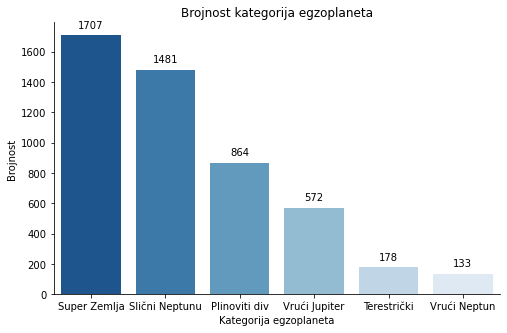

In [40]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=exo_data['exo_class_ext'],palette='Blues_r',data = exo_data,order=exo_data['exo_class_ext'].value_counts().index)
annotate_countplot(scp,exo_data,0.01)
sns.despine()
plt.xlabel('Kategorija egzoplaneta')
plt.ylabel('Brojnost')
plt.title('Brojnost kategorija egzoplaneta')
plt.show()

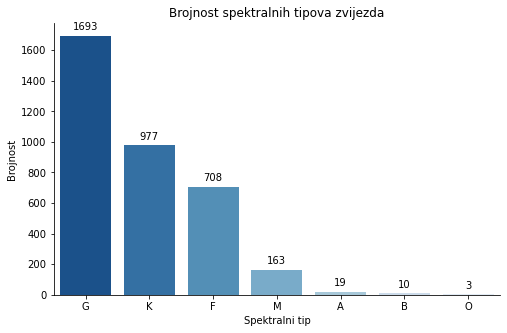

In [41]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=planetary_systems['st_spect'],palette='Blues_r',data = planetary_systems,order=planetary_systems['st_spect'].value_counts().index)
annotate_countplot(scp,planetary_systems,0.01)
sns.despine()
plt.xlabel('Spektralni tip')
plt.ylabel('Brojnost')
plt.title('Brojnost spektralnih tipova zvijezda')
plt.show()

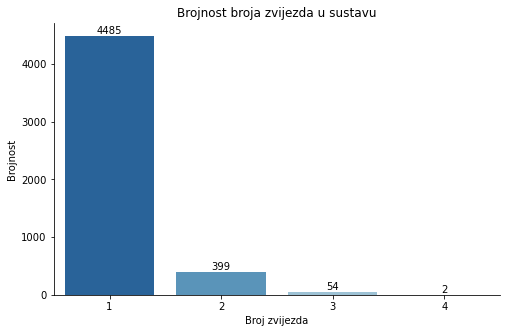

In [42]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=exo_data['sy_snum'],palette='Blues_r',data = planetary_systems,order=planetary_systems['sy_snum'].value_counts().index)
annotate_countplot(scp,planetary_systems,0.01)
sns.despine()
plt.xlabel('Broj zvijezda')
plt.ylabel('Brojnost')
plt.title('Brojnost broja zvijezda u sustavu')
plt.show()

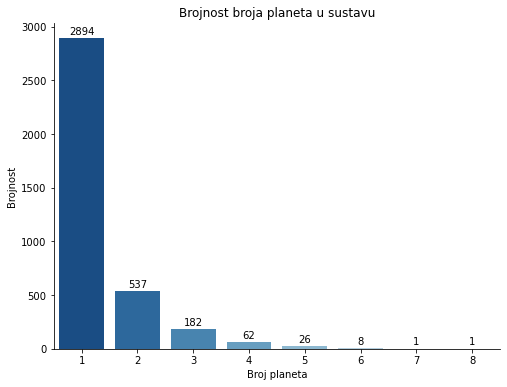

In [43]:
_,_ = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
scp = sns.countplot(x = planetary_systems['sy_pnum'], data = planetary_systems, palette='Blues_r')
annotate_countplot(scp,planetary_systems,0.01)
plt.xlabel('Broj planeta')
plt.ylabel('Brojnost')
plt.title('Brojnost broja planeta u sustavu')
sns.despine()

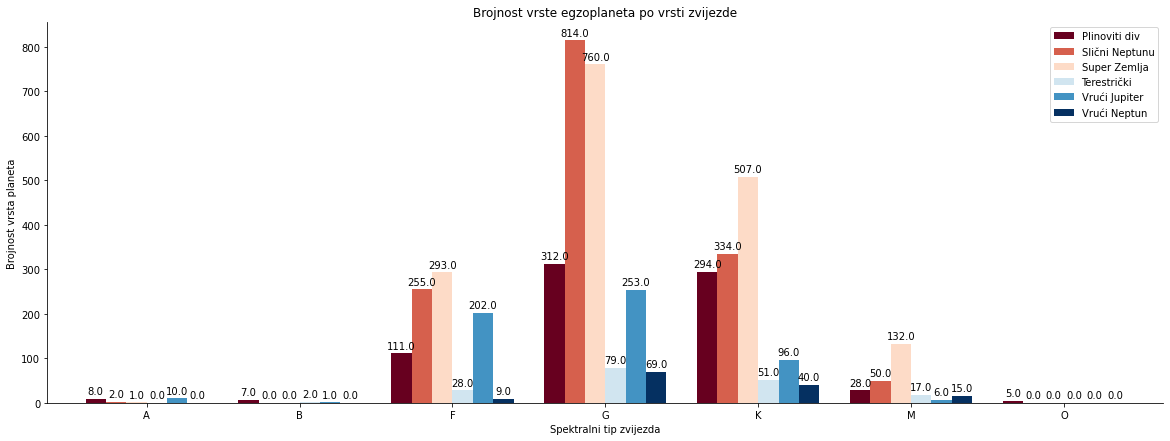

In [44]:
pl = ht.plot(kind="bar", rot=0,colormap='RdBu', figsize=(20,7), width=0.8)
annotate_countplot(pl,ht,1.5)
plt.xlabel('Spektralni tip zvijezda')
plt.ylabel('Brojnost vrsta planeta')
plt.title('Brojnost vrste egzoplaneta po vrsti zvijezde')
sns.despine()
plt.show()

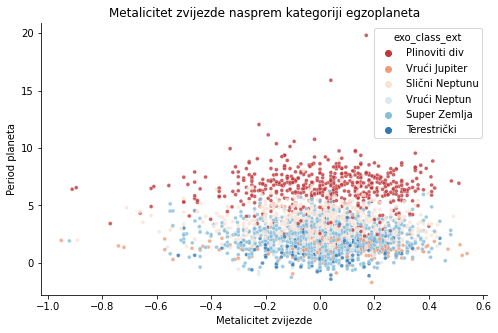

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=planetary_systems['st_metallicity'],y=np.log(exo_data['pl_orbper']),hue=exo_data['exo_class_ext'],palette='RdBu',alpha=0.8,s=15).set(title='Metalicitet zvijezde nasprem kategoriji egzoplaneta')
sns.despine()
plt.xlabel('Metalicitet zvijezde')
plt.ylabel('Period planeta')
plt.show()